## Задача 1

### Однажды в Самарканде турист заказывал Яндекс-такси. На десятом заказе впервые приехал таксист, который уже раньше приезжал к туристу. Для упрощения предположим, что все n таксистов Самарканда всегда на работе и приезжают равновероятно.


#### а) [5] Постройте график функции правдоподобия как функции от общего количества такси n. Найдите оценку числа n методом максимального правдоподобия.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tqdm

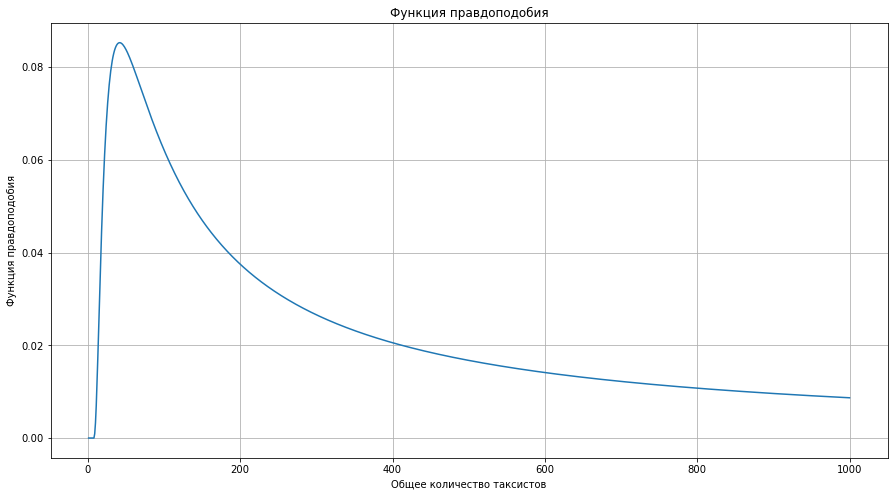

Оценка числа n: 42


In [2]:
k = 10 # в какой раз приезжает таксист

def likelihood(k, n):
    if k == 1:
        return 0
    # В первый заказ был таксист, который 100% раньше не попадался
    l = 1
    # k-2 раз приехал не тот таксист
    for i in range(1, k-1):
        l *= (n-i)/n
    # На k раз приехал тот таксист
    l *= (k-1)/n
    return l
            
n_values = np.arange(1, 1001)
likelihoods = []
for i in range(1, 1001):
    likelihoods.append(likelihood(k, i))

# Строим график
plt.figure(figsize = (15, 8))
plt.plot(n_values, likelihoods)
plt.xlabel('Общее количество таксистов')
plt.ylabel('Функция правдоподобия')
plt.title('Функция правдоподобия')
plt.grid(True)
plt.show()

estimated_index = np.argmax(likelihoods)
print('Оценка числа n:', estimated_index + 1)


#### б) [5] Постройте график математического ожидания номера заказа, на котором происходит первый повторный приезда, как функции от общего количества такси n. Найдите оценку числа n методом моментов.

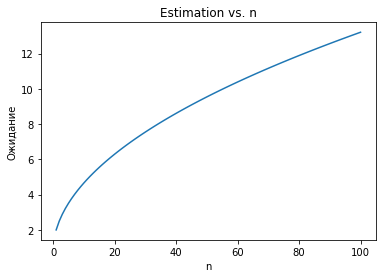

In [3]:
E_list = []
for n in range(1, 101):
    E = 0
    for k in range(1, 1001):
        E += k * likelihood(k, n)
    E_list.append(E)

plt.plot(range(1, 101), E_list)
plt.xlabel('n')
plt.ylabel('Ожидание')
plt.title('Estimation vs. n')
plt.show()

In [4]:
closest_index = E_list.index(min(E_list, key=lambda x: abs(x - 10)))
print("Оценка числа n методом моментов", closest_index+1)

Оценка числа n методом моментов 55


##### в) [15] Предположим, что настоящее n равно 100. Проведя 10000 симуляций вызовов такси до первого повторного, рассчитайте 10000 оценок методом моментов и 10000 оценок методом максимального правдоподобия. Постройте гистограммы для оценок двух методов. Оцените смещение, дисперсию и среднеквадратичную ошибку двух методов.

In [5]:
n = 100

def simulate_taxi_calls(n, simulations=10000):
    data = []
    for _ in range(simulations):
        taxi_drivers = set()
        count = 0
        while True:
            count += 1
            driver = np.random.randint(1, n + 1)
            if driver in taxi_drivers:
                data.append(count)
                break
            taxi_drivers.add(driver)
    return data

            
data = simulate_taxi_calls(n = n, simulations=10000)

In [6]:
# Оценка ML
esimations_ML = []

for i in range(10000):
    likelihoods = []
    for n in range(1, 1000):
        likelihoods.append(likelihood(data[i], n))
    estimated_index = np.argmax(likelihoods)
    esimations_ML.append(estimated_index)
len(esimations_ML)

10000

In [7]:
# Оценка MM
from tqdm import tqdm
estimations_MM = []

for i in range(100):
    E_list = []
    for n in range(1, 150):
        E = 0
        for k in range(1, 301):
            E += k * likelihood(k, n)
        E_list.append(E)
    closest_index = E_list.index(min(E_list, key=lambda x: abs(x - data[i])))
    estimations_MM.append(closest_index + 1)

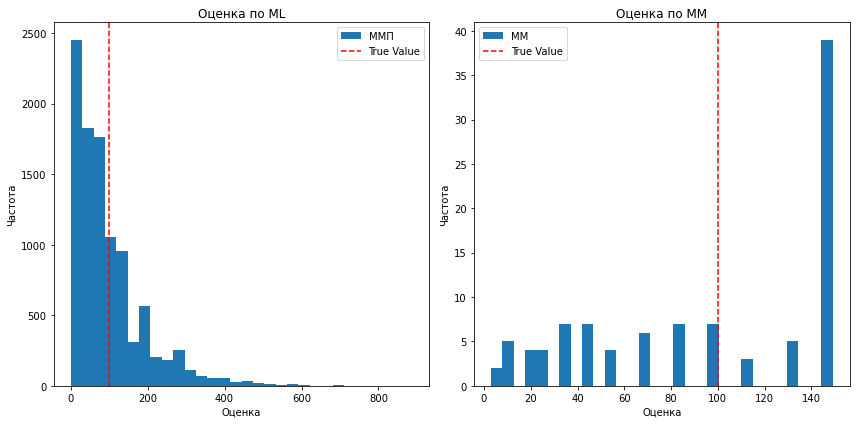

In [8]:
# Создание subplots с горизонтальной ориентацией
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Первый подграфик
axes[0].hist(esimations_ML, label='ММП', bins=30)
axes[0].axvline(x=100, color='red', linestyle='--', label='True Value')
axes[0].set_xlabel('Оценка')
axes[0].set_ylabel('Частота')
axes[0].set_title('Оценка по ML')
axes[0].legend()

# Второй подграфик
axes[1].hist(estimations_MM, label='ММ', bins=30)
axes[1].axvline(x=100, color='red', linestyle='--', label='True Value')
axes[1].set_xlabel('Оценка')
axes[1].set_ylabel('Частота')
axes[1].set_title('Оценка по MM')
axes[1].legend()

plt.tight_layout()
plt.show()


In [9]:
bias_ML = np.mean(esimations_ML) - 100
bias_MM = np.mean(estimations_MM) - 100

print('bias_ML', bias_ML)
print('bias_MM', bias_MM)

variance_ML = np.var(esimations_ML)
variance_MM = np.var(estimations_MM)

print('variance_ML', variance_ML)
print('variance_MM', variance_MM)

mse_ML = np.mean((np.array(esimations_ML) - 100)**2)
mse_MM = np.mean((np.array(estimations_MM) - 100)**2)

print('mse_ML', mse_ML)
print('mse_MM', mse_MM)

bias_ML -3.560299999999998
bias_MM -5.260000000000005
variance_ML 8813.051963909998
variance_MM 2713.7724000000003
mse_ML 8825.7277
mse_MM 2741.44


## Задача 2

###  Однажды в Самарканде турист заказывал Яндекс-такси.На десятом заказе он обнаружил,что у таксистов было 6 разных имён. Для упрощения предположим, что все n имён среди таксистов встречаются равновероятно и независимо от поездки к поездке.

#### а) [5] Постройте график функции правдоподобия как функции от общего количества имён n. Найдите оценку числа n методом максимального правдоподобия.

In [10]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

days = 10
unique = 6

def mle(n, days, unique):
    L = 1
    for i in range(1, unique):
        L *= ((n - i) / n)

    if days >= unique:
        combinations = itertools.combinations_with_replacement(np.arange(1, unique + 1), days - unique)
        cnt = 0

        for combination in combinations:
            mult = 1
            for i in range(days - unique):
                mult *= combination[i]
            cnt += mult

        L *= (cnt / (n ** (days - unique)))

    return L

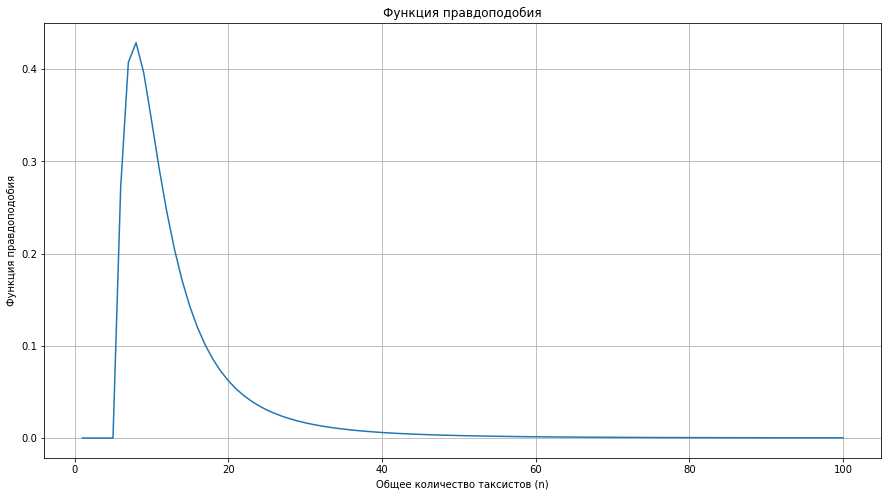

Оценочное значение n 8


In [75]:
n_values = np.arange(1, 101)
mles = []
for n in range(1, 101):
    mles.append(mle(n=n, days=days, unique=unique))

plt.figure(figsize=(15, 8))
plt.plot(n_values, mles)
plt.xlabel('Общее количество таксистов (n)')
plt.ylabel('Функция правдоподобия')
plt.title('Функция правдоподобия')
plt.grid(True)
plt.show()

estimated_index = np.argmax(mles)
print('Оценочное значение n', estimated_index + 1)


#### б) [5] Постройте график математического ожидания числа разных имён у 10 таксистов, как функции от общего количества имён n. Найдите оценку числа n методом моментов

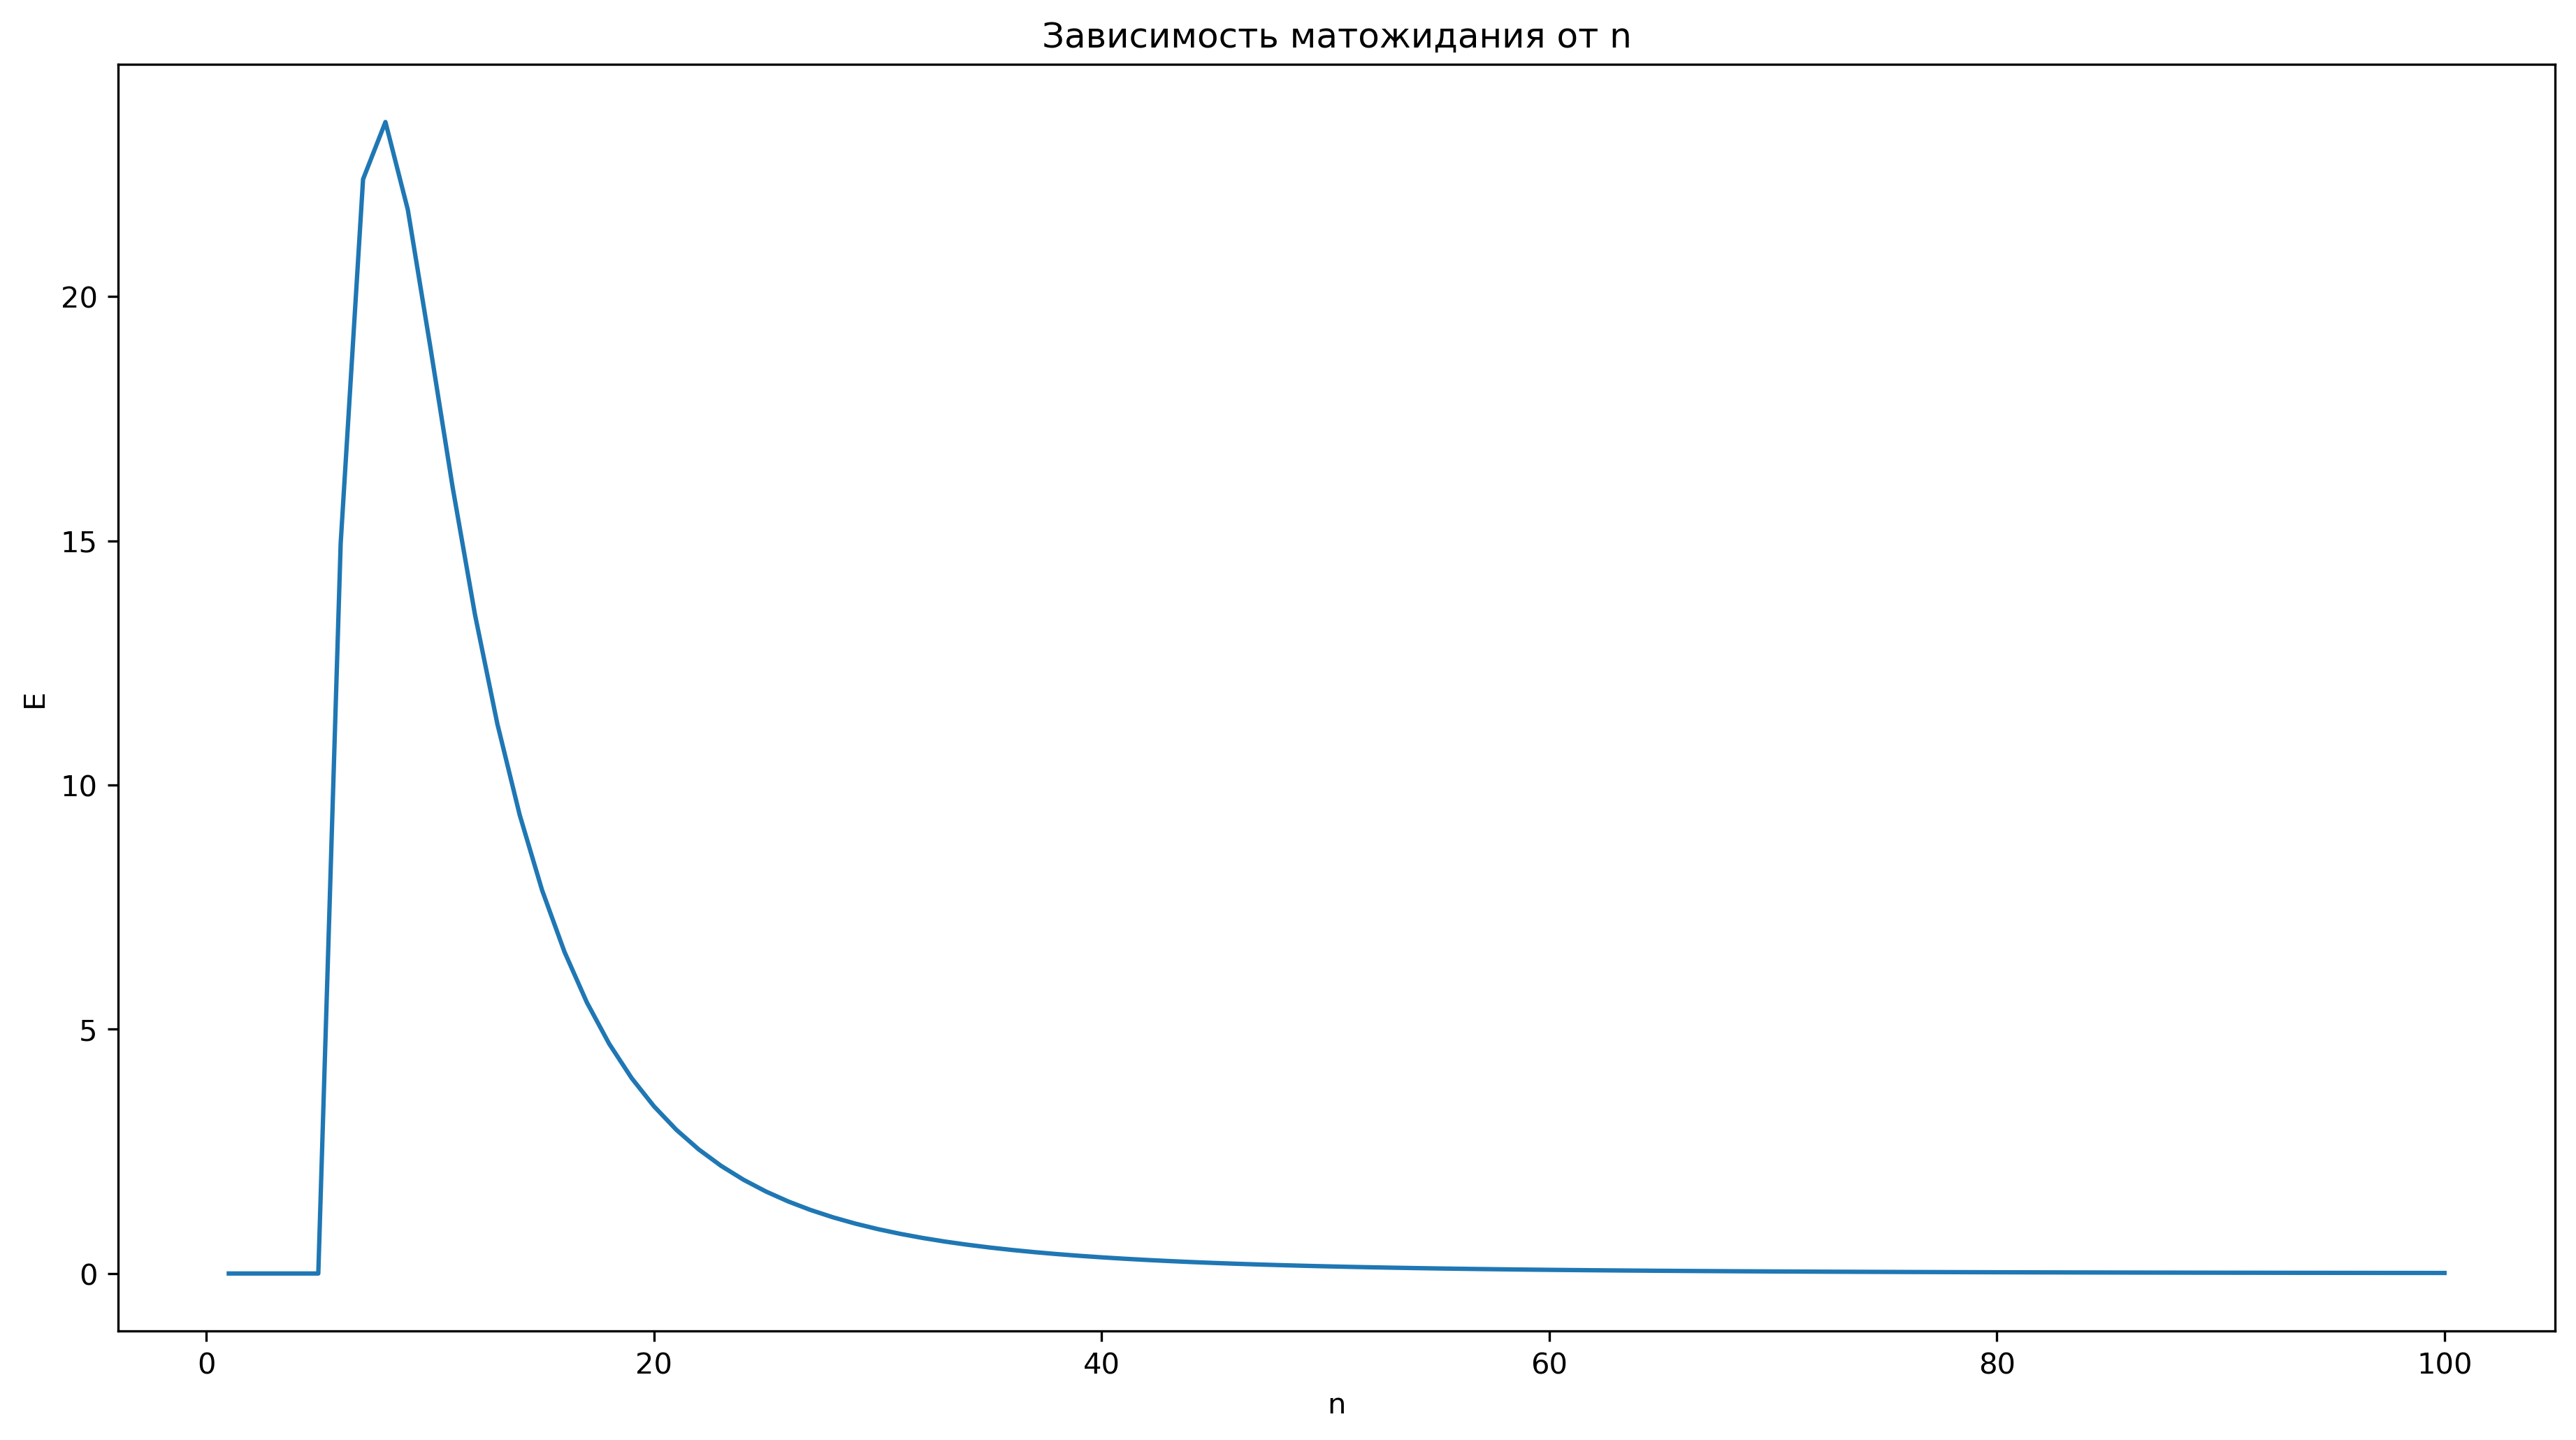

In [69]:
def E(n, days):
    E_n = 0
    for u in range(days+1):
        E_n += mle(n, days, unique) * u
    return E_n

E_list = []
ns = range(1, 101)
for n in ns:
    E_list.append(E(n, 10))

plt.figure(figsize=(15, 8), dpi=300)
plt.plot(ns, E_list)
plt.title('Зависимость матожидания от n')
plt.xlabel('n')
plt.ylabel('E')
plt.show()

In [72]:
closest_index = E_list.index(min(E_list, key=lambda x: abs(x - 6)))
print("Оценка числа n методом моментов", closest_index+1)

Оценка числа n методом моментов 17


#### в) [15] Предположим, что настоящее n равно 20. Проведя 10000 симуляций десяти вызовов такси, рассчитайте 10000 оценок методом моментов и 10000 оценок методом максимально- го правдоподобия. Постройте гистограммы для оценок двух методов. Оцените смещение, дисперсию и среднеквадратичную ошибку двух методов.

Update 2023-06-07: если по выборке в симуляциях оценка метода моментов или метода максимального правдоподобия стремится к бесконечности, то можно ограничить её свер- ху большим числом, например, 100.

In [79]:
samples = []
taxi = np.random.choice(range(1,21), size=(10000,10)) 
for i in taxi:
    samples.append(len(set(i)))

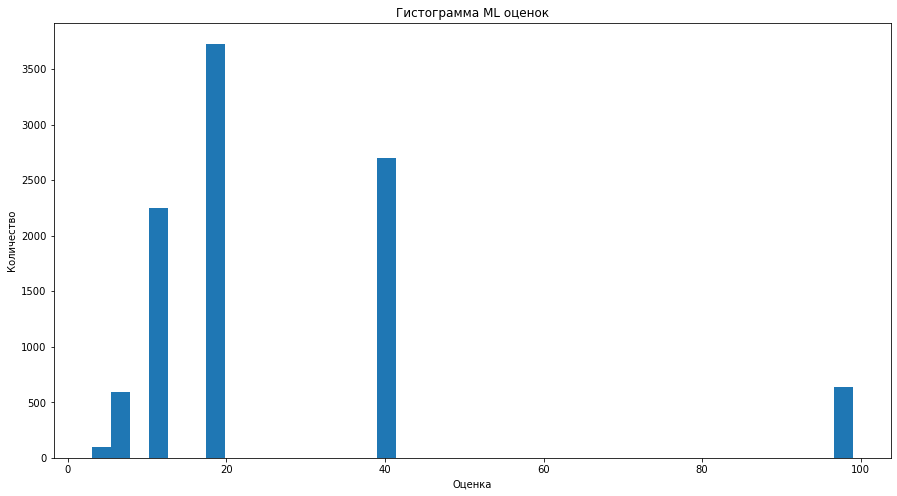

In [146]:
estimations_ML = []
# посчитаем ML оценки
indexes_ML = []
for sample in samples:
    mles = []
    for n in range(1, 101):
        mles.append(mle(n=n, days=10, unique=sample))
    estimations_ML.append(max(mles))
    estimated_index = np.argmax(mles)
    indexes_ML.append(estimated_index)
    
plt.figure(figsize=(15, 8))
plt.hist(indexes_ML, bins = 40) 
plt.title('Гистограмма ML оценок') 
plt.xlabel('Оценка') 
plt.ylabel('Количество')
plt.show()

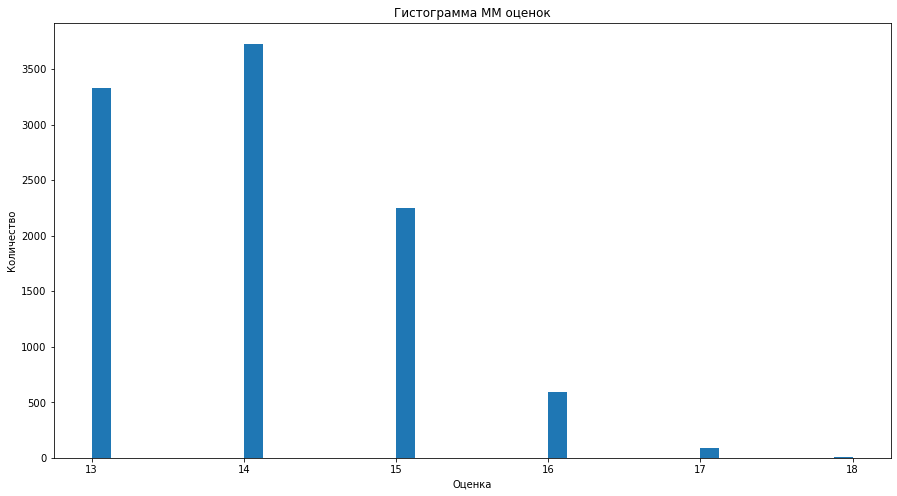

In [147]:
# посчитаем MM оценки
indexes_MM = []
estimations_MM = []
Es= []

ns=range(1,101) 
for n in ns:
    Es.append(E(n,10))

for sample in samples:
    estimations_MM.append( abs(np.array(Es)-sample))
    indexes_MM.append(np.argmin(abs(np.array(Es)-sample)))
    
plt.figure(figsize=(15, 8))
plt.hist(indexes_MM, bins = 40) 
plt.title('Гистограмма MM оценок') 
plt.xlabel('Оценка') 
plt.ylabel('Количество')
plt.show()

In [149]:
bias_ML = np.mean(esimations_ML) - 100
bias_MM = np.mean(estimations_MM) - 100

print('bias_ML', bias_ML)
print('bias_MM', bias_MM)

variance_ML = np.var(esimations_ML)
variance_MM = np.var(estimations_MM)

print('variance_ML', variance_ML)
print('variance_MM', variance_MM)

mse_ML = np.mean((np.array(esimations_ML) - 100)**2)
mse_MM = np.mean((np.array(estimations_MM) - 100)**2)

print('mse_ML', mse_ML)
print('mse_MM', mse_MM)

bias_ML -3.560299999999998
bias_MM -92.48294895619051
variance_ML 8813.051963909998
variance_MM 5.048318432949996
mse_ML 8825.7277
mse_MM 8558.144166066288


## Задача 3

### Иноагент Иннокентий по 20 наблюдениям строит 95%-й доверительный интервал для математического ожидания несколькими способами: классический асимптотический нормальный интервал, с помощью наивного бутстрэпа, с помощью бутстрэпа t-статистики.

#### **а)** [15]Для каждого способа спомощью 10000 симуляций оцените вероятностьтого,что номинально 95%-й доверительный интервал фактически накрывает математическое ожидание, если наблюдения распределены экспоненциально с интенсивностью 1.

In [12]:
from scipy import stats
import pandas as pd
import numpy as np
import pandas as pd

In [13]:
# Генерируем выборку
alpha = 0.05
lambd = 1
n = 20
true_mean = 1 / lambd
size = 10000
sample = stats.expon.rvs(scale=1/lambd, size=(size, n))

##### Классический ассимптотический доверительный интервал

In [14]:
count_covered = 0

for i in range(sample.shape[0]):
    # считаем среднее
    sample_mean = np.mean(sample[i])
    # считаем стандартное отклонение
    sample_std = np.std(sample[i], ddof=1) 
    # считаем доверительный интервал
    CI = stats.norm.interval(1 - alpha, loc=sample_mean, 
                                              scale=sample_std/np.sqrt(len(sample[i])))

    # считаем процент накрытывания математического ожидания
    if CI[0] <= true_mean <= CI[1]:
        count_covered += 1

probability_covered = count_covered / sample.shape[0]

print("Вероятность с классическим ассимтотическим интервалом")
print(probability_covered)

Вероятность с классическим ассимтотическим интервалом
0.9052


##### Наивный бутстрэп

In [15]:
count_covered = 0

for i in sample:
    # Бутстрэпируем выборку
    bootstrap_sample = np.random.choice(i.flatten(), size=(size, n), replace=True)
    # Считаем среднюю
    bootstrap_mean = np.mean(bootstrap_sample, axis = 1)
    # Считаем квантили
    CI = np.percentile(bootstrap_mean, [2.5, 97.5])
    # Считаем доверительный интервал
    left = CI[0]
    right = CI[1]

    if left <= true_mean <= right:
        count_covered += 1

probability_covered = count_covered / sample.shape[0]

print("Вероятность  с наивным бутстрэпом")
print(probability_covered)

Вероятность  с наивным бутстрэпом
0.9038


#### Бутстэп t-статистики

In [16]:
count_covered = 0
sample_mean = np.mean(sample)
sample_std = np.std(sample)

for i in sample:
    # Бутстрэпируем выборку
    bootstrap_sample = np.random.choice(i.flatten(), size=(size, n), replace=True)
    # Считаем среднюю и отклонение
    bootstrap_mean = np.mean(bootstrap_sample, axis = 1)
    bootstrap_std = np.std(bootstrap_sample, axis = 1, ddof = 1)
    # Считаем t статистику
    t_statistic = (bootstrap_mean - sample_mean)/ (bootstrap_std/np.sqrt(n))
    # Считаем квантили для t статистики
    CI = sample_mean - np.percentile(t_statistic, [97.5, 2.5]) * (sample_std / np.sqrt(n))
    left = CI[0]
    right = CI[1]
    
    if left <= true_mean <= right:
        count_covered += 1

probability_covered = count_covered / size

print("Вероятность  с бутстрэпом t-статистики")
print(probability_covered)

Вероятность  с бутстрэпом t-статистики
0.9044


#### **б)** [5]Пересчитайте вероятности накрытия,если наблюдения имеют распределение Стьюдента с тремя степенями свободы.

In [17]:
from scipy.stats import t

In [18]:
degrees_of_freedom = 3  # Степени свободы распределения Стьюдента
size = 1000 
n = 20

sample = t.rvs(df=degrees_of_freedom, size=(size, n))

##### Классический ассимптотический доверительный интервал

In [19]:
count_covered = 0

for i in range(sample.shape[0]):
    # считаем среднее
    sample_mean = np.mean(sample[i])
    # считаем стандартное отклонение
    sample_std = np.std(sample[i], ddof=1) 
    # считаем доверительный интервал
    CI = stats.norm.interval(1 - alpha, loc=sample_mean, 
                                              scale=sample_std/np.sqrt(len(sample[i])))

    # считаем процент накрытывания математического ожидания
    if CI[0] <= 0 <= CI[1]:
        count_covered += 1

probability_covered = count_covered / sample.shape[0]

print("Вероятность с классическим ассимтотическим интервалом")
print(probability_covered)

Вероятность с классическим ассимтотическим интервалом
0.937


##### Наивный бутстрэп

In [20]:
count_covered = 0

for i in sample:
    # Бутстрэпируем выборку
    bootstrap_sample = np.random.choice(i.flatten(), size=(size, n), replace=True)
    # Считаем среднюю
    bootstrap_mean = np.mean(bootstrap_sample, axis = 1)
    # Считаем квантили
    CI = np.percentile(bootstrap_mean, [2.5, 97.5])
    # Считаем доверительный интервал
    left = CI[0]
    right = CI[1]

    if left <= 0 <= right:
        count_covered += 1

probability_covered = count_covered / sample.shape[0]

print("Вероятность  с наивным бутстрэпом")
print(probability_covered)

Вероятность  с наивным бутстрэпом
0.917


#### Бутстэп t-статистики

In [21]:
count_covered = 0
sample_mean = np.mean(sample)
sample_std = np.std(sample)

for i in sample:
    # Бутстрэпируем выборку
    bootstrap_sample = np.random.choice(i.flatten(), size=(size, n), replace=True)
    # Считаем среднюю и отклонение
    bootstrap_mean = np.mean(bootstrap_sample, axis = 1)
    bootstrap_std = np.std(bootstrap_sample, axis = 1, ddof = 1)
    # Считаем t статистику
    t_statistic = (bootstrap_mean - sample_mean)/ (bootstrap_std/np.sqrt(n))
    # Считаем квантили для t статистики
    CI = sample_mean - np.percentile(t_statistic, [97.5, 2.5]) * (sample_std / np.sqrt(n))
    left = CI[0]
    right = CI[1]
    
    if left <= 0 <= right:
        count_covered += 1

probability_covered = count_covered / size

print("Вероятность  с бутстрэпом t-статистики")
print(probability_covered)

Вероятность  с бутстрэпом t-статистики
0.918


#### в) [5] Какой способ оказался лучше?

####  - Лучше оказался классический ассимптотический доверительный интервал

## Задача 4

#### Проверьте гипотезу о том, что ожидаемые результаты экзамена по теории вероятностей тех, у кого фамилия начинается с гласной буквы и с согласной буквы, равны. В качестве альтернатив- ной гипотезы возьмите гипотезу о неравенстве.

In [22]:
import pandas as pd
import numpy as np
from scipy import stats
import math
from scipy.stats import norm

In [47]:
df = pd.read_csv('prob_exam_data.csv', delimiter=';')
df = df.dropna(subset=['Last name'])


In [48]:
vowels = ['А', 'Е', 'Ё', 'И', 'О', 'У', 'Ы', 'Э', 'Ю', 'Я']
consonants = ['Б', 'В', 'Г', 'Д', 'Ж', 'З', 'Й', 'К', 'Л', 'М', 'Н', 'П', 'Р', 'С', 'Т', 'Ф', 'Х', 'Ц', 'Ч', 'Ш', 'Щ']

# Функция для определения, начинается ли фамилия с гласной
def starts_with_vowel(last_name):
    return str(last_name)[0].upper() in vowels

def starts_with_consonant(last_name):
    return str(last_name)[0].upper() in consonants 

df['Vowel Start'] = df['Last name'].str.upper().apply(starts_with_vowel)
df['Consonant Start'] = df['Last name'].str.upper().apply(starts_with_consonant
                                                         )
group1 = df[df['Vowel Start'] == True]
group2 = df[df['Consonant Start'] == True]

results_vowel = group1['Result'].to_list()
results_consonant  = group2['Result'].to_list()

In [49]:
### Будем использовать 95% доверительный интервал

#### а) [5] Используйте тест Уэлча.

In [50]:
t_stat, p_value = stats.ttest_ind(results_vowel, results_consonant, equal_var=False)

print("P-value", p_value)
print('H0 не отвергается')

P-value 0.40412434043363643
H0 не отвергается


#### б) [5] Используйте наивный бутстрэп.

In [61]:
n_boot = 10000

mean_diff_bootstrap = []
mean_diff_real = np.mean(results_vowel) - np.mean(results_consonant)

for i in range(n_boot):
    # Бутстрэпируем выборки
    sample_vowel = np.random.choice(results_vowel, size=len(results_vowel), replace=True)
    sample_consonant = np.random.choice(results_consonant, size=len(results_consonant), replace=True)
    
    # Считаем разницу матожиданий
    mean_diff = np.mean(sample_vowel) - np.mean(sample_consonant)
    mean_diff_bootstrap.append(mean_diff)

    
# # Подсчет количества разностей больших или равных mean_diff_real
p_value = (np.abs(mean_diff_bootstrap) >= np.abs(mean_diff_real)).mean()

print("P-value", p_value)
print('H0 не отвергается')

P-value 0.5422
H0 не отвергается


#### в) [5] Используйте бутстрэп t-статистики

In [91]:
import numpy as np

# Вычисление наблюдаемой t-статистики
observed_mean_diff = np.mean(results_vowel) - np.mean(results_consonant)
observed_std_diff = np.std(results_vowel) - np.std(results_consonant)
observed_t_statistic = observed_mean_diff / np.sqrt(observed_std_diff**2 / len(results_vowel) + observed_std_diff**2 / len(results_consonant))

n_iterations = 1000
bootstrap_diffs = []
for _ in range(n_iterations):
    # Бутстрэпируем выбоорки
    vowel_sample = np.random.choice(results_vowel, size=len(results_vowel), replace=True)
    consonant_sample = np.random.choice(results_consonant, size=len(results_consonant), replace=True)
    # Считаем разницу средних и стандартное отклонение
    bootstrap_mean_diff = np.mean(vowel_sample) - np.mean(consonant_sample)
    bootstrap_std_diff = np.std(vowel_sample) - np.std(consonant_sample)
    # Строим t-статистику
    bootstrap_t_statistic = bootstrap_mean_diff / np.sqrt(bootstrap_std_diff**2 / len(vowel_sample) + bootstrap_std_diff**2 / len(consonant_sample))
    bootstrap_diffs.append(bootstrap_t_statistic)

# Считаем p_value (абсолютное значение тк двусторонняя альтернатива)
p_value = (np.abs(bootstrap_diffs) >= np.abs(observed_t_statistic)).mean()

print("P-value", p_value)
print('H0 не отвергается')

P-value 0.297
H0 не отвергается


#### г) [5] Используйте перестановочный тест

In [53]:
mean_diff = np.mean(results_vowel) - np.mean(results_consonant)

combined_results = results_vowel + results_consonant

# Создадим словарь разниц средних 

perm_diffs = []
for _ in range(10000):  
    np.random.shuffle(combined_results)
    
    perm_vowel = combined_results[:len(results_vowel)]
    perm_consonant = combined_results[len(results_vowel):]
    
    perm_diff = np.mean(perm_vowel) - np.mean(perm_consonant)
    perm_diffs.append(perm_diff)

# Посчитаем p_value
p_value = (np.abs(perm_diffs) >= np.abs(mean_diff)).mean()

print("P-value", p_value)
print('H0 не отвергается')

P-value 0.3967
H0 не отвергается


## Задача 5

### Составьте таблицу сопряжённости, поделив студентов писавших экзамен на четыре группы по двум признакам: набрал ли больше медианы или нет, на согласную или гласную букву начи- нается фамилия.

In [54]:
median = df['Result'].median()
median

17.0

In [55]:
group_vowel = df[df['Vowel Start'] == True]
group_consonant = df[df['Consonant Start'] == True]

group_vowel_higher = group_vowel[group_vowel['Result'] >= median].shape[0]
group_vowel_lower = group_vowel[group_vowel['Result'] < median].shape[0]

group_consonant_higher = group_consonant[group_consonant['Result'] >= median].shape[0]
group_consonant_lower = group_consonant[group_consonant['Result'] < median].shape[0]

a = group_consonant_higher
b = group_consonant_lower
c = group_vowel_higher
d = group_vowel_lower

#### а) [5]Постройте 95% асимптотический интервал для отношения шансов хорошо написать экзамен («несогласных» к «согласным»). Проверьте гипотезу о том, что отношение шансов равно 1 и укажите P-значение.


In [56]:
import math

# Посчитаем отношение шансов
odds_ratio = (a * d) / (b * c)
log_odds_ratio = math.log(odds_ratio)

# Посчитаем стандартное отклонениее
SE = math.sqrt((1 / a) + (1 / b) + (1 / c) + (1 / d))

# Посчитаем z-распредление
Z = (log_odds_ratio - 0) / SE

# 95% доверительный интервал
left = np.exp(np.log(odds_ratio) - 1.96 * SE)
right = np.exp(log_odds_ratio + 1.96 * SE)
CI = [left, right]

# Посчитаем p_value
p_value = 2 * (1 - norm.cdf(abs(Z)))

print('95% Доверительный интервал', CI)
print("P-value", p_value)
print('H0 не отвергается')

95% Доверительный интервал [0.7783782464636886, 2.627440308557758]
P-value 0.24903498883111563
H0 не отвергается


#### б) [5] Постройте 95% асимптотический интервал для отношения вероятностей хорошо написать экзамен. Проверьте гипотезу о том, что отношение вероятностей равно 1 и укажите P-значение.

In [57]:
# Посчитаем отношение шансов
odds_ratio = (a / (a + b)) / (c / (c + d))
log_odds_ratio = math.log(odds_ratio)

# Посчитаем стандартное отклонениее
SE = math.sqrt((1 / (a + b)) + (1 / (c + d)))

# Посчитаем z-распредление
Z = (log_odds_ratio - 0) / SE

# 95% доверительный интервал
left = np.exp(np.log(odds_ratio) - 1.96 * SE)
right = np.exp(log_odds_ratio + 1.96 * SE)
CI = [left, right]

# Посчитаем p_value
p_value = 2 * (1 - norm.cdf(abs(Z)))

print('95% Доверительный интервал', CI)
print("P-value", p_value)
print('H0 не отвергается')

95% Доверительный интервал [0.8720229229642056, 1.6001317462583218]
P-value 0.2820691303806466
H0 не отвергается


#### в) [5] Постройте 95% интервал для отношения шансов хорошо написать экзамен с помощью наивного бутстрэпа. Проверьте гипотезу о том, что отношение шансов равно 1 и укажите P-значение.

In [58]:
import numpy as np
import pandas as pd

# Заданные переменные
median = df['Result'].median()
bootstrap_iterations = 1000
ratios = []

for _ in range(bootstrap_iterations):
    # Ресэмплирование данных
    resampled_data = df.sample(frac=1, replace=True)
    
    # Вычисление отношения шансов хорошо написать экзамен
    group_vowel_resampled = resampled_data[resampled_data['Vowel Start'] == True]
    group_consonant_resampled = resampled_data[resampled_data['Consonant Start'] == True]
    
    group_vowel_higher_resampled = group_vowel_resampled[group_vowel_resampled['Result'] >= median].shape[0]
    group_vowel_lower_resampled = group_vowel_resampled[group_vowel_resampled['Result'] < median].shape[0]
    
    group_consonant_higher_resampled = group_consonant_resampled[group_consonant_resampled['Result'] >= median].shape[0]
    group_consonant_lower_resampled = group_consonant_resampled[group_consonant_resampled['Result'] < median].shape[0]
    
    ratio =  (group_consonant_higher_resampled / group_consonant_lower_resampled) / (group_vowel_higher_resampled / group_vowel_lower_resampled) 
    ratios.append(ratio)

# Расчет 95% интервала
lower_bound = np.percentile(ratios, 2.5)
upper_bound = np.percentile(ratios, 97.5)

observed_ratio = ((group_vowel_higher / group_vowel_lower) / (group_consonant_higher / group_consonant_lower))
p_value = (np.abs(np.array(ratios) - 1) >= np.abs(observed_ratio - 1)).mean()

print("95% CI", (lower_bound, upper_bound))
print("P-value", p_value)
print('H0 не отвергается')

95% CI (0.7463357672703962, 2.677721461202448)
P-value 0.63
H0 не отвергается


## Задача 6

### Иноагент Иннокентий Вероятностно-Статистический считает,что длина фамилии положительно влияет на результат экзамена по теории вероятностей. А именно, он предполагает, что ожидаемый результат за экзамен прямо пропорционален длине фамилии, E(Yi) = βFi, где Yi — результат за экзамен по 30-балльной шкале, Fi — количество букв в фамилии.


#### а) [10] Оцените β методом моментов. Рассчитайте выборочную корреляцию.

In [102]:
# Вычислите количество букв в каждой фамилии
df['len name'] = df['Last name'].apply(len)

# Оценка betta
beta_hat = df['Result'].mean() / df['len name'].mean() # Считаем угол наклона прямой

# Корреляция
correlation = df['Result'].corr(df['len name'])

print("Оценка β методом моментов", beta_hat)
print("Выборочная корреляция", correlation)


Оценка β методом моментов 2.0708589562300634
Выборочная корреляция 0.02469181146883104


#### б) [5] С помощью перестановочного теста найдите P -значение и формально протестируйте гипотезу о том, что корреляция равна нулю.


In [ ]:
import numpy as np

# Корелляция в генеральной выборке
observed_correlation = df['Result'].corr(df['len name'])

# Генерация случайных перестановок и вычисление корреляции для каждой перестановки
num_permutations = 3000  
permuted_correlations = []

for _ in range(num_permutations):
    permuted_df = df.copy()
    permuted_df['len name'] = np.random.permutation(permuted_df['len name'])
    permuted_correlation = permuted_df['Result'].corr(permuted_df['len name'])
    permuted_correlations.append(permuted_correlation)

p_value = (np.abs(permuted_correlations) >= np.abs(observed_correlation)).mean()
print("P-value", p_value)
print('H0 не отвергается --> корелляция равна нулю')

## Задача 7

### [10] С помощью chatgpt решите любую задачу из нашего курса теории вероятностей и статистики. Можно брать задачи из прошлых контрольных, лекций, семинаров и даже этого домашнего задания. В качестве ответа приведите полный диалог с chatgpt.

##### User
Прочитай условия задачи и запомни

Разработанный в порядке импортозамещения алгоритм прогнозирования погоды Глафира предсказывает шесть дней подряд, будет ли дождь на следующий день. Глафира верно угадывает погоду с неизвестной вероятностью p каждый раз независимо от других.
Величины X1, X2, ..., X6 равны 1, если Глафира угадала, и 0, если ошиблась.
Для вступления в Российский Клуб Гадалок алгоритм Глафира проходит тест Тьюринга:
Если 􏰔6i=1 Xi ⩽ 4, то гипотеза H0 о p = 0.5 не отвергается.
Если 􏰔6i=1 Xi ⩾ 5, то гипотеза H0 отвергается в пользу альтернативной гипотезы о высоком мастерстве и Глафиру принимают в клуб.

##### ChatGpt
Условия задачи:

Разработанный алгоритм прогнозирования погоды Глафира предсказывает шесть дней подряд, будет ли дождь на следующий день. Глафира угадывает погоду с неизвестной вероятностью p каждый раз независимо от других.

Для вступления в Российский Клуб Гадалок алгоритм Глафира проходит тест Тьюринга:

Если все значения X1, X2, ..., X6 равны 1 и меньше или равны 4 (􏰔6i=1 Xi ⩽ 4), то гипотеза H0 о p = 0.5 не отвергается.
Если все значения X1, X2, ..., X6 равны 1 и больше или равны 5 (􏰔6i=1 Xi ⩾ 5), то гипотеза H0 отвергается в пользу альтернативной гипотезы о высоком мастерстве, и Глафира принимается в клуб.
Пожалуйста, уточните, если у вас есть конкретные вопросы по этим условиям.

##### User 

Да, все верно

а) (5 баллов) Найдите вероятность ошибки первого рода.

##### ChatGpt

Вероятность ошибки первого рода (α) - это вероятность отвергнуть нулевую гипотезу H0, когда она на самом деле верна. В данном случае, нулевая гипотеза H0 заключается в том, что вероятность p = 0.5.

Вероятность ошибки первого рода можно вычислить, исходя из условий задачи:

Если все значения X1, X2, ..., X6 равны 1 и больше или равны 5 (􏰔6i=1 Xi ⩾ 5), то гипотеза H0 отвергается.

Таким образом, чтобы произошла ошибка первого рода, все значения Xi должны быть равны 1 и больше или равны 5.

Вероятность каждого значения Xi равна p, поскольку Глафира угадывает с вероятностью p каждый раз независимо от других.

Вероятность ошибки первого рода будет равна произведению вероятностей каждого значения Xi:

α = p * p * p * p * p * p = p^6

Таким образом, вероятность ошибки первого рода равна p^6.

##### User 

В твоем решении учтен только сценарий, что сумма равна 6. А случай, где сумма равна 5?

##### ChatGpt

Приношу извинения за недостаток в предыдущем ответе. Действительно, в моем предыдущем ответе упущен случай, когда сумма значений Xi равна 5.

Давайте рассмотрим оба случая:

Случай, когда сумма значений Xi равна 6:
В этом случае все значения Xi должны быть равны 1. Так как каждое значение Xi независимо и имеет вероятность p, вероятность получить такой результат равна:
P(X1 = 1) * P(X2 = 1) * P(X3 = 1) * P(X4 = 1) * P(X5 = 1) * P(X6 = 1) = p^6.

Случай, когда сумма значений Xi равна 5:
В этом случае пять значения Xi должны быть равны 1, а одно значение Xi должно быть равно 0. Существует шесть различных комбинаций распределения этих значений, и каждая из них имеет вероятность p^5 * (1-p):
P(X1 = 1, X2 = 1, X3 = 1, X4 = 1, X5 = 1, X6 = 0) = p^5 * (1-p).
P(X1 = 1, X2 = 1, X3 = 1, X4 = 1, X5 = 0, X6 = 1) = p^5 * (1-p).
P(X1 = 1, X2 = 1, X3 = 1, X4 = 0, X5 = 1, X6 = 1) = p^5 * (1-p).
P(X1 = 1, X2 = 1, X3 = 0, X4 = 1, X5 = 1, X6 = 1) = p^5 * (1-p).
P(X1 = 0, X2 = 1, X3 = 1, X4 = 1, X5 = 1, X6 = 1) = p^5 * (1-p).
P(X1 = 1, X2 = 0, X3 = 1, X4 = 1, X5 = 1, X6 = 1) = p^5 * (1-p).

Суммируя вероятности для всех шести случаев, получаем:
6 * p^5 * (1-p).

Таким образом, общая вероятность ошибки первого рода будет равна:
α = p^6 + 6 * p^5 * (1-p).

#### User 

Используй комбинаторику и посчитай конечное значение

#### ChatGpt

Используя комбинаторику, мы можем точно посчитать вероятность ошибки первого рода для случая, когда сумма значений Xi равна 5.

Для этого нам нужно определить количество комбинаций, в которых пять значений Xi равны 1, а одно значение Xi равно 0.

Есть шесть возможных позиций для значения 0 в последовательности X1, X2, ..., X6. Таким образом, число сочетаний C из 6 по 1 равно 6.

Вероятность получить одну комбинацию, в которой пять значений Xi равны 1, а одно значение Xi равно 0, составляет p^5 * (1-p).

Итак, общая вероятность ошибки первого рода для случая суммы значений Xi равной 5 равна:
6 * p^5 * (1-p).

Пожалуйста, уточните, если у вас есть дополнительные вопросы.

#### User

При p = 0.5 это равно чему?

#### ChatGpt

Если вероятность p = 0.5, то мы можем вычислить значение вероятности ошибки первого рода для обоих случаев - когда сумма значений Xi равна 6 и когда сумма значений Xi равна 5.

Случай, когда сумма значений Xi равна 6:
Вероятность ошибки первого рода будет равна p^6 = 0.5^6 = 0.015625.

Случай, когда сумма значений Xi равна 5:
Вероятность ошибки первого рода будет равна 6 * p^5 * (1-p) = 6 * 0.5^5 * (1-0.5) = 6 * 0.03125 * 0.5 = 0.09375.

Таким образом, при p = 0.5:

Вероятность ошибки первого рода для случая суммы значений Xi равной 6 равна 0.015625.
Вероятность ошибки первого рода для случая суммы значений Xi равной 5 равна 0.09375.
Пожалуйста, дайте мне знать, если у вас возникли еще вопросы.

#### User

То есть в сумме 0.015625 + 0.09375?

#### ChatGpt

Да, верно. Вероятности ошибки первого рода для обоих случаев можно сложить, чтобы получить общую вероятность ошибки первого рода:

0.015625 + 0.09375 = 0.109375 (или примерно 10.94%).

Таким образом, общая вероятность ошибки первого рода при p = 0.5 составляет около 10.94%.

Извините за возможное недопонимание в предыдущих ответах. Если у вас есть еще вопросы, пожалуйста, дайте мне знать.

#### Ответ: 10.94%

## Задача 8

### [5] Укажите любой источник по теории вероятностей или статистике, который вам оказался полезен в течение года. Это может быть статья, видео, задача, всё что угодно. Объясните, с чем конкретно этот источник помог разобраться. Лучше привести в пример внешний источник, не упомянутый на вики курса, но можно и внутренний.

https://www.youtube.com/@user-bg8cd4fn7d/playlists 

- Курс с хорошими лекциями от Филиппа Ульянкина, достаточно просто объясняющий важные концепты
- Там же появился линал от Б.Б. Демешева)